In [4]:
# Interactive plots from
# http://matplotlib.1069221.n5.nabble.com/how-to-create-interactive-plots-in-jupyter-python3-notebook-td46804.html
get_ipython().magic(u'pylab notebook')
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/ipykernel/.*')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/widgets/.*')


Populating the interactive namespace from numpy and matplotlib


In [ ]:
import poseEval
reload(poseEval)
import romainLegConfig
reload(romainLegConfig)
from romainLegConfig import bottomconf as conf
# from romainLegConfig import side1conf as conf
import tensorflow as tf
tf.reset_default_graph()
poseEval.poseEvalTrain(conf,restore=False)


In [1]:
# Gradient analysis
import poseEval
reload(poseEval)
from poseEval import *
import tensorflow as tf
from romainLegConfig import bottomconf as conf

useNet = True
restore = True

tf.reset_default_graph()
ph,feed_dict,out,queue,out_dict = poseEvalNetInit(conf)
feed_dict[ph['phase_train']] = True
feed_dict[ph['keep_prob']] = 1.
evalSaver = createEvalSaver(conf) 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(out,ph['y'])
correct_pred = tf.equal(tf.argmax(out,1),tf.argmax(ph['y'],1))

loss = tf.reduce_mean(cross_entropy)
tf.summary.scalar('cross_entropy',loss)

opt = tf.train.AdamOptimizer(learning_rate= \
                  ph['learning_rate']).minimize(loss)

merged = tf.summary.merge_all()


sess =  tf.InteractiveSession()
data,coord,threads = createCursors(sess,queue,conf)
updateFeedDict(conf,'train',distort=True,sess=sess,data=data,feed_dict=feed_dict,ph=ph)
if useNet:
    evalstartat = restoreEval(sess,evalSaver,restore,conf,feed_dict)
    initializeRemainingVars(sess,feed_dict)

            #* conf.gamma**math.floor(excount/conf.step_size)
feed_dict[ph['learning_rate']] = 0
feed_dict[ph['keep_prob']] = 1.
feed_dict[ph['phase_train']] = False



Loading eval variables from /home/mayank/work/poseEstimation/cache/romainLegBottom/romainLegeval-2000
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Initializing variable:eval/scale0/layer1_X/weights/Adam:0
Initializing variable:eval/scale0/layer1_X/weights/Adam_1:0
Initializing variable:eval/scale0/layer1_X/biases/Adam:0
Initializing variable:eval/scale0/layer1_X/biases/Adam_1:0
Initializing variable:eval/scale0/layer1_X/batch_norm/beta/Adam:0
Initializing variable:eval/scale0/layer1_X/batch_norm/beta/Adam_1:0
Initializing variable:eval/scale0/layer1_X/batch_norm/gamma/Adam:0
Initializing variable:eval/scale0/layer1_X/batch_norm/gamma/Adam_1:0
Initializing variable:eval/scale0/layer2/weights/Adam:0
Initializing variable:eval/scale0/layer2/weights/Adam_1:0
Initializing variable:eval/scale0/layer2/biases/Adam:0
Initializing variable:eval/scale0/layer2/biases/Adam_1:0
Initializing variable:eval/scale0/layer2/batch_norm/beta/Adam:0
Initializing variable:eval/scale

Populating the interactive namespace from numpy and matplotlib


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


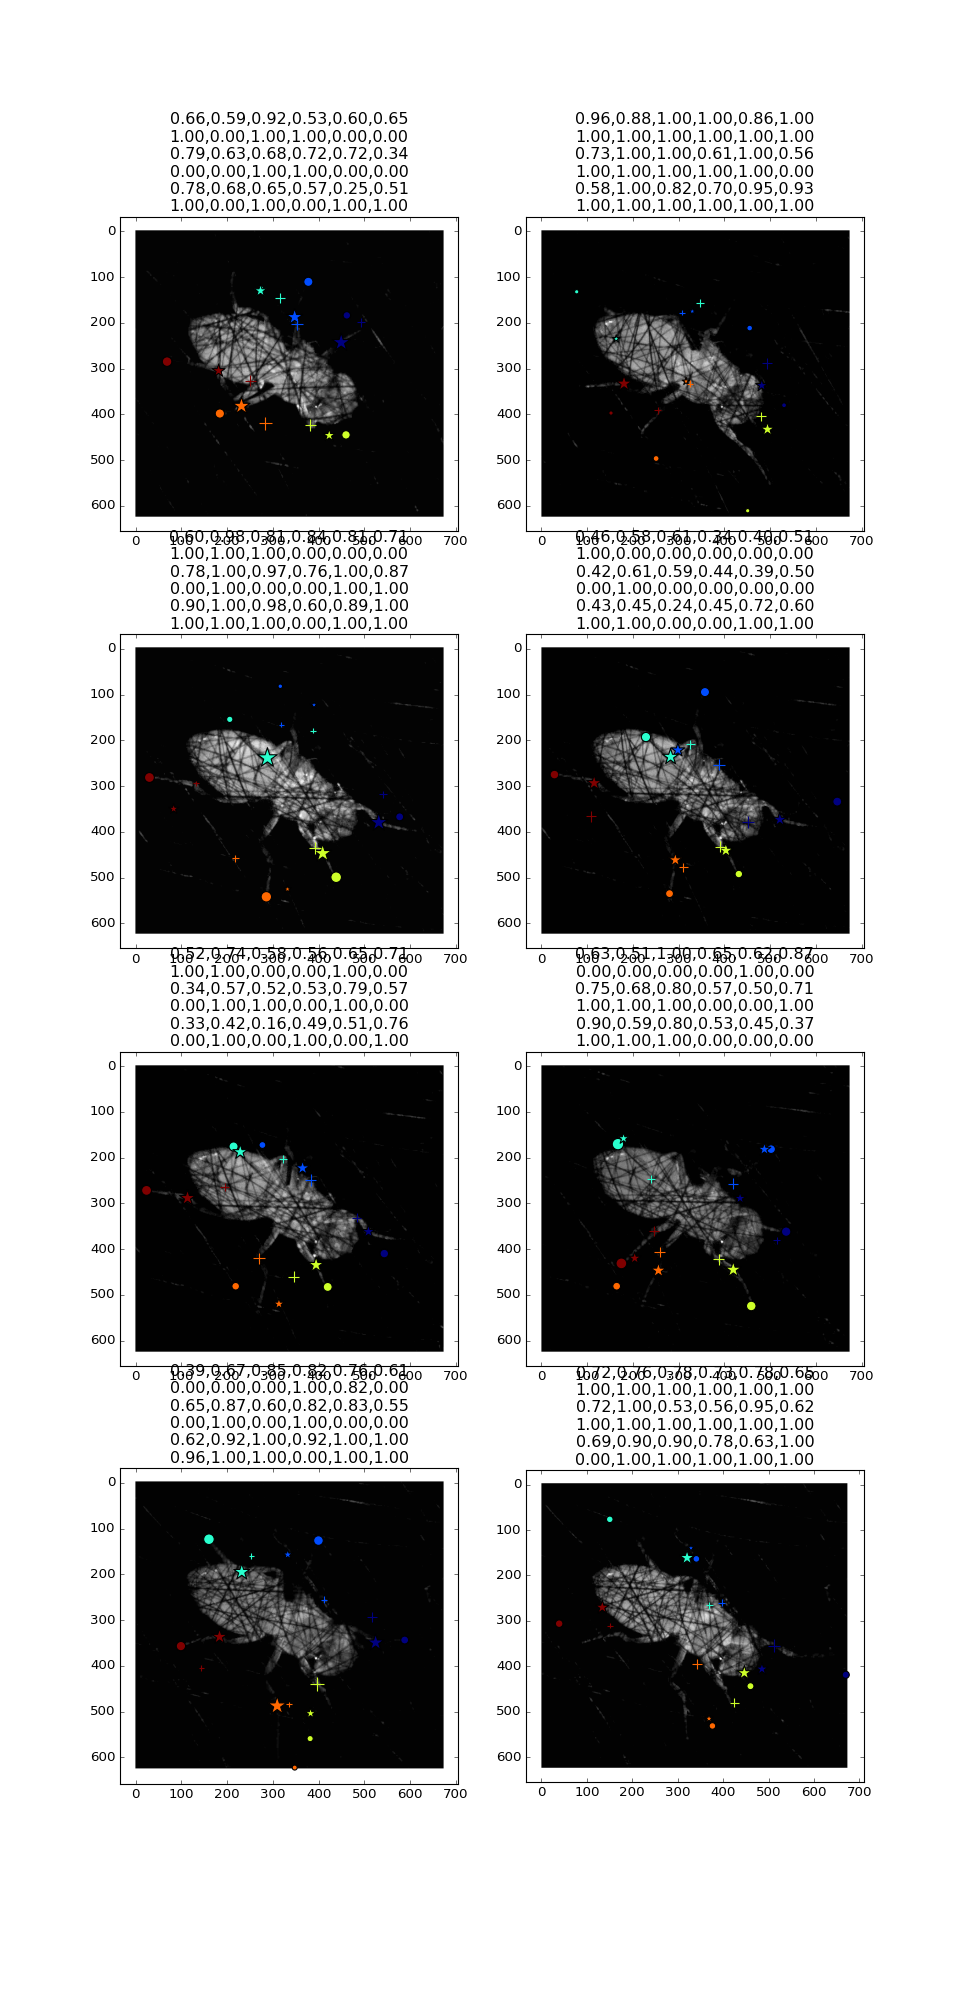

In [2]:
# Interactive plots from
# http://matplotlib.1069221.n5.nabble.com/how-to-create-interactive-plots-in-jupyter-python3-notebook-td46804.html
get_ipython().magic(u'pylab notebook')
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/ipykernel/.*')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/widgets/.*')

for ndx in range(np.random.randint(50)):
    alllocs = updateFeedDict(conf,'val',distort=True,sess=sess,data=data,feed_dict=feed_dict,ph=ph)
if useNet:
    oo,cc = sess.run([out,cross_entropy],feed_dict=feed_dict)
else:
    oo = feed_dict[ph['y']]
    cc = np.zeros([8,])

ims = feed_dict[ph['X'][0]]

tt = oo.reshape(8,18)
tt = tt.clip(min=0,max=1)
vv = feed_dict[ph['y']].reshape(8,18)
pp = np.abs(tt-vv)
nc = 2; nr = 4
fig = plt.figure(figsize=[12,25])
mrk = ['o','*','+']
ss = [30,100,50]
for idx in range(ims.shape[0]):
    ax = fig.add_subplot(nr,nc,idx+1)
    ax.imshow(ims[idx,:,:,0],cmap='gray')
    tstr = []
    for jj in range(3):
        sz = ss[jj]*(3*pp[idx,jj*6:(jj+1)*6]+0.5)
        ax.scatter(alllocs[idx,jj*6:(jj+1)*6,0],alllocs[idx,jj*6:(jj+1)*6,1],
                   c=np.linspace(0,1,6),cmap=cm.jet,marker=mrk[jj],s=sz)
        tstr.append(','.join('{:.2f}'.format(a) for a in tt[idx,jj*6:(jj+1)*6]))
        tstr.append(','.join('{:.2f}'.format(a) for a in vv[idx,jj*6:(jj+1)*6]))
    ax.set_title('\n'.join(tstr))

In [3]:
# measure different accuracies

pp = np.zeros([800,18])
ii = np.zeros([800,18])
count = 100
for ndx in range(count):
    alllocs = updateFeedDict(conf,'val',distort=True,sess=sess,data=data,feed_dict=feed_dict,ph=ph)
    oo,cc = sess.run([out,cross_entropy],feed_dict=feed_dict)
    oo = oo.reshape(8,18)
    vv = feed_dict[ph['y']].reshape(8,18)
    pp[ndx*8:(ndx+1)*8,:] = oo-vv
    ii[ndx*8:(ndx+1)*8,:] = oo
 


In [10]:
qq = np.zeros([800,18])
ff = np.round(qq).astype('int')
ff[1:5,1:5]


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [4]:
kk = np.abs(pp).mean(axis=0)
print kk

[ 0.37896121  0.38067589  0.39869147  0.37137306  0.37302562  0.37314457
  0.33989232  0.32451905  0.36312148  0.35431564  0.34383599  0.29669226
  0.34307382  0.32009221  0.2660146   0.36353872  0.2849851   0.26645092]


<IPython.core.display.Javascript object>


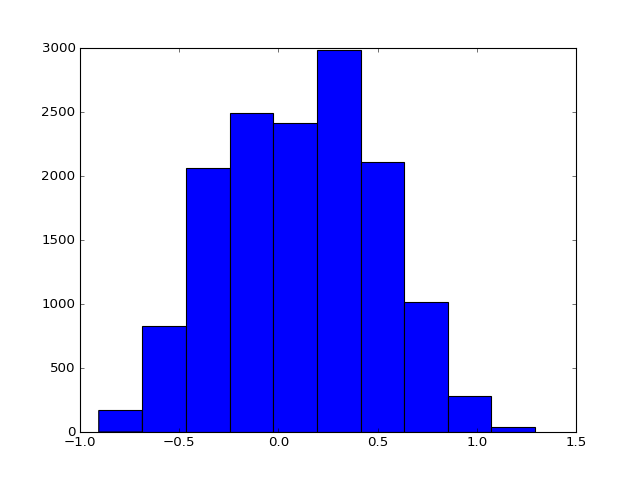

<IPython.core.display.Javascript object>


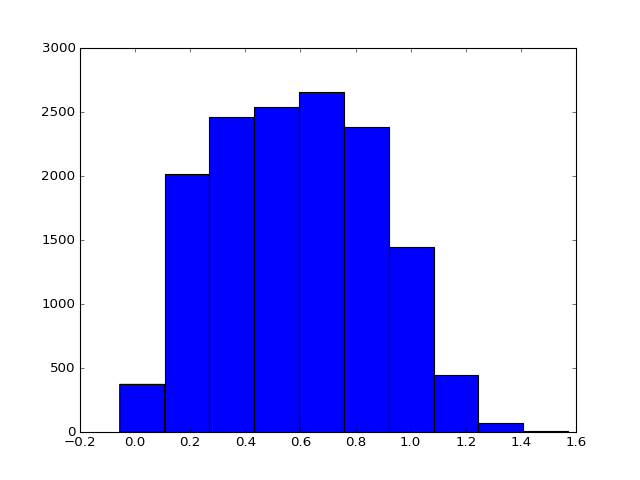

(array([  372.,  2017.,  2460.,  2539.,  2660.,  2384.,  1449.,   442.,
           73.,     4.]),
 array([-0.05579757,  0.1068759 ,  0.26954938,  0.43222285,  0.59489632,
         0.75756979,  0.92024327,  1.08291674,  1.24559021,  1.40826368,
         1.57093716]),
 <a list of 10 Patch objects>)

In [5]:
plt.figure()
plt.hist(pp.flatten())
plt.figure()
plt.hist(ii.flatten())

In [ ]:
vv = tf.global_variables()



import re
aa = [v for v in vv if not re.search('Adam|batch_norm|beta',v.name)]
gg = sess.run(tf.gradients(loss,aa),feed_dict=feed_dict)

kk = sess.run(aa,feed_dict=feed_dict)

ss = [np.sum(np.abs(g.flatten())) for g in gg]
ww = [np.sum(np.abs(g.flatten())) for g in kk]

rr = [s/w for s,w in zip(ss,ww)]

In [ ]:
#for new
bb = [[r,n.name] for r,n in zip(rr,aa)]
for b in bb:
    print b
bbnew = bb

In [ ]:
#for reloaded
bb = [[r,n.name] for r,n in zip(rr,aa)]
for b in bb:
    print b

In [ ]:
for v in vv:
    if re.search('beta|gamma',v.name):
        print v.eval()

In [ ]:
import re
aa = [v for v in vv if not re.search('Adam|batch_norm|beta',v.name)]
gg = sess.run(tf.gradients(loss,aa),feed_dict=feed_dict)

kk = sess.run(aa,feed_dict=feed_dict)

In [ ]:
ss = [np.sum(np.abs(g.flatten())) for g in gg]
ww = [np.sum(np.abs(g.flatten())) for g in kk]

In [ ]:
rr = [s/w for s,w in zip(ss,ww)]

bb = [[r,n.name] for r,n in zip(rr,aa)]
for b in bb:
    print b

In [ ]:
plt.hist(rr)


In [83]:
from romainLegConfig import bottomconf as conf
import h5py

L = h5py.File(conf.labelfile,'r')
pts = np.array(L['labeledpos'])
curpts = np.array(L[pts[0,0]])
frames = np.where(np.invert( np.any(np.isnan(curpts[:,:,:]),axis=(1,2))))[0]
loc = curpts[frames[0],:,:]

print loc.shape    


(2, 18)


In [84]:
jj = curpts[frames,:,:]
print jj.shape

(471, 2, 18)


In [101]:
kk = np.logspace(4,10,3,base=2)
kk = np.concatenate([[0,],kk,[np.inf,]])
# kk = np.insert(kk,0,0)
# kk = np.insert(kk,np.inf,-1)
print kk
jj = np.random.random(8)*1200
hh = np.digitize(jj,kk)
print hh
print jj

[    0.    16.   128.  1024.    inf]
[3 3 3 3 3 4 3 3]
[  222.12119545   633.19117671   298.93473508   189.06227159   226.03778974
  1177.48129398   209.39749836   779.03170014]


In [104]:
pp = np.random.random([5,12])
pp = np.reshape(pp,[6,-1])
pp.shape

(6, 10)